<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 20px; border-radius: 5px; text-align: center; border: 4px solid white;">
    <h1 style="color: white; font-size: 30px; font-weight: bold;">Fruit Classification</h1>
</div>


## Deloyment using Streamlit: [Link](https://www.kaggle.com/code/abdallahprogrammer/fruit-classification-using-cnn-deployment)

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Importing Libraries & Dataset</h1>
</div>


In [1]:
import numpy as np 
import pandas as pd 
import os        
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import glob as gb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import PIL
import cv2
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers import Dropout

2024-05-17 04:31:45.432709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-17 04:31:45.432868: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-17 04:31:45.598145: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Generating DataFrame</h1>
</div>


In [2]:
base_dir = '/kaggle/input/fruits/fruits-360_dataset/fruits-360'
train_dir = os.path.join(base_dir,  'Training')
test_dir = os.path.join(base_dir, 'Test')
for dirpath, dirnames, filenames in os.walk(train_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 131 directories and 0 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training'.
There are 0 directories and 490 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince'.
There are 0 directories and 492 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Grapefruit White'.
There are 0 directories and 490 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Granadilla'.
There are 0 directories and 479 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Orange'.
There are 0 directories and 429 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Apple Red 3'.
There are 0 directories and 490 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Grape White 2'.
There are 0 directories and 462 images in '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Corn Husk'.
There are 0 directories and 490 images in '/kaggle/input/fruits/fruits-360_dataset

In [3]:
import os
import pandas as pd

# Base directory path on Kaggle
base_dir = '/kaggle/input/fruits/fruits-360_dataset/fruits-360'
train_dir = os.path.join(base_dir, 'Training')
validation_dir = os.path.join(base_dir, 'Test')

def create_dataframe(data_path):
    df = []
    for c in os.listdir(data_path):
        class_folder = os.path.join(data_path, c)
        for f in os.listdir(class_folder):
            f_path = os.path.join(class_folder, f)
            if f_path.endswith('jpg'):
                df.append([f_path, c])
    return pd.DataFrame(df, columns=('filename', 'class'))

# Get the sorted list of classes
classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# Create dataframes
df_train = create_dataframe(train_dir)
df_test = create_dataframe(validation_dir)

# Display the dataframes
df_train, df_test


(                                                filename     class
 0      /kaggle/input/fruits/fruits-360_dataset/fruits...    Quince
 1      /kaggle/input/fruits/fruits-360_dataset/fruits...    Quince
 2      /kaggle/input/fruits/fruits-360_dataset/fruits...    Quince
 3      /kaggle/input/fruits/fruits-360_dataset/fruits...    Quince
 4      /kaggle/input/fruits/fruits-360_dataset/fruits...    Quince
 ...                                                  ...       ...
 67687  /kaggle/input/fruits/fruits-360_dataset/fruits...  Tomato 2
 67688  /kaggle/input/fruits/fruits-360_dataset/fruits...  Tomato 2
 67689  /kaggle/input/fruits/fruits-360_dataset/fruits...  Tomato 2
 67690  /kaggle/input/fruits/fruits-360_dataset/fruits...  Tomato 2
 67691  /kaggle/input/fruits/fruits-360_dataset/fruits...  Tomato 2
 
 [67692 rows x 2 columns],
                                                 filename     class
 0      /kaggle/input/fruits/fruits-360_dataset/fruits...    Quince
 1      /kaggle/inp

In [4]:
df_train.head()

,filename,class
0,/kaggle/input/fruits/fruits-360_dataset/fruits...,Quince
1,/kaggle/input/fruits/fruits-360_dataset/fruits...,Quince
2,/kaggle/input/fruits/fruits-360_dataset/fruits...,Quince
3,/kaggle/input/fruits/fruits-360_dataset/fruits...,Quince
4,/kaggle/input/fruits/fruits-360_dataset/fruits...,Quince


<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Splitting Training file into Train and Validation</h1>
</div>


In [5]:
df_train, df_val = train_test_split(df_train, test_size=0.30, random_state=0)
df_train,df_val

(                                                filename               class
 7919   /kaggle/input/fruits/fruits-360_dataset/fruits...        Tomato Heart
 62739  /kaggle/input/fruits/fruits-360_dataset/fruits...       Grape White 3
 30292  /kaggle/input/fruits/fruits-360_dataset/fruits...   Potato Red Washed
 8090   /kaggle/input/fruits/fruits-360_dataset/fruits...    Onion Red Peeled
 65330  /kaggle/input/fruits/fruits-360_dataset/fruits...            Kohlrabi
 ...                                                  ...                 ...
 41993  /kaggle/input/fruits/fruits-360_dataset/fruits...              Walnut
 21243  /kaggle/input/fruits/fruits-360_dataset/fruits...       Tomato Maroon
 45891  /kaggle/input/fruits/fruits-360_dataset/fruits...   Tomato Cherry Red
 42613  /kaggle/input/fruits/fruits-360_dataset/fruits...  Apple Crimson Snow
 43567  /kaggle/input/fruits/fruits-360_dataset/fruits...             Tangelo
 
 [47384 rows x 2 columns],
                                   

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Eploratory Data Analysis (EDA)</h1>
</div>


In [6]:
# Function to count the number of images in a directory
def count_images_in_directory(directory):
    total_images = 0
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):  # Adjust file extensions as needed
                total_images += 1
    return total_images

# Count the number of images in the train and test directories
train_image_count = count_images_in_directory(train_dir)
test_image_count = count_images_in_directory(test_dir)

print("Number of images in train directory:", train_image_count)
print("Number of images in test directory:", test_image_count)

Number of images in train directory: 67692
Number of images in test directory: 22688


In [7]:
import pathlib
data_dir = pathlib.Path(train_dir) 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) 
print(class_names)

['Apple Braeburn' 'Apple Crimson Snow' 'Apple Golden 1' 'Apple Golden 2'
 'Apple Golden 3' 'Apple Granny Smith' 'Apple Pink Lady' 'Apple Red 1'
 'Apple Red 2' 'Apple Red 3' 'Apple Red Delicious' 'Apple Red Yellow 1'
 'Apple Red Yellow 2' 'Apricot' 'Avocado' 'Avocado ripe' 'Banana'
 'Banana Lady Finger' 'Banana Red' 'Beetroot' 'Blueberry' 'Cactus fruit'
 'Cantaloupe 1' 'Cantaloupe 2' 'Carambula' 'Cauliflower' 'Cherry 1'
 'Cherry 2' 'Cherry Rainier' 'Cherry Wax Black' 'Cherry Wax Red'
 'Cherry Wax Yellow' 'Chestnut' 'Clementine' 'Cocos' 'Corn' 'Corn Husk'
 'Cucumber Ripe' 'Cucumber Ripe 2' 'Dates' 'Eggplant' 'Fig' 'Ginger Root'
 'Granadilla' 'Grape Blue' 'Grape Pink' 'Grape White' 'Grape White 2'
 'Grape White 3' 'Grape White 4' 'Grapefruit Pink' 'Grapefruit White'
 'Guava' 'Hazelnut' 'Huckleberry' 'Kaki' 'Kiwi' 'Kohlrabi' 'Kumquats'
 'Lemon' 'Lemon Meyer' 'Limes' 'Lychee' 'Mandarine' 'Mango' 'Mango Red'
 'Mangostan' 'Maracuja' 'Melon Piel de Sapo' 'Mulberry' 'Nectarine'
 'Nectarine Flat

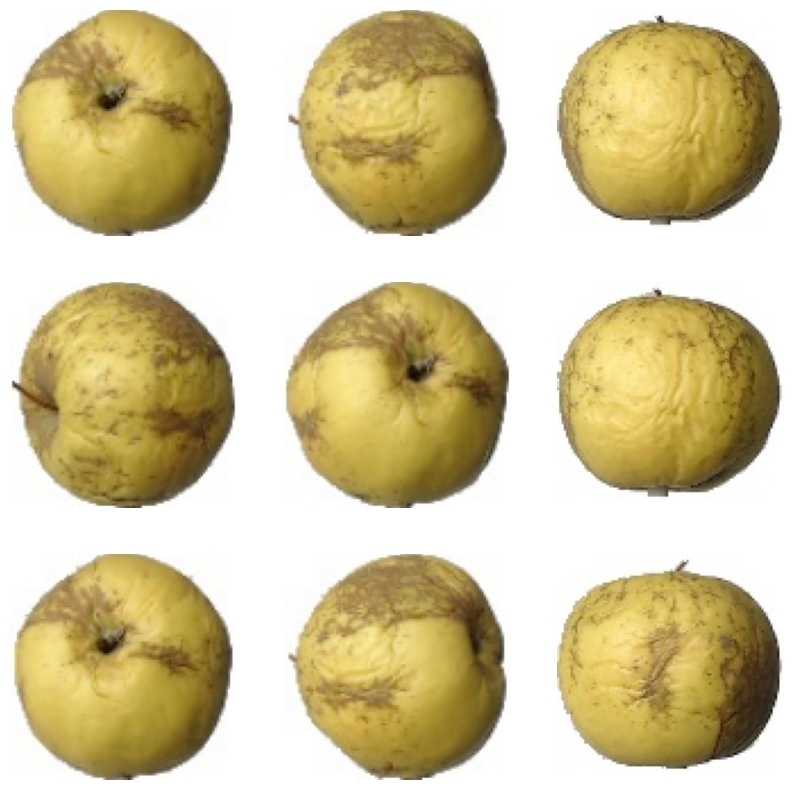

In [8]:
fruits = list(data_dir.glob('Apple Golden 1/*.jpg'))
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

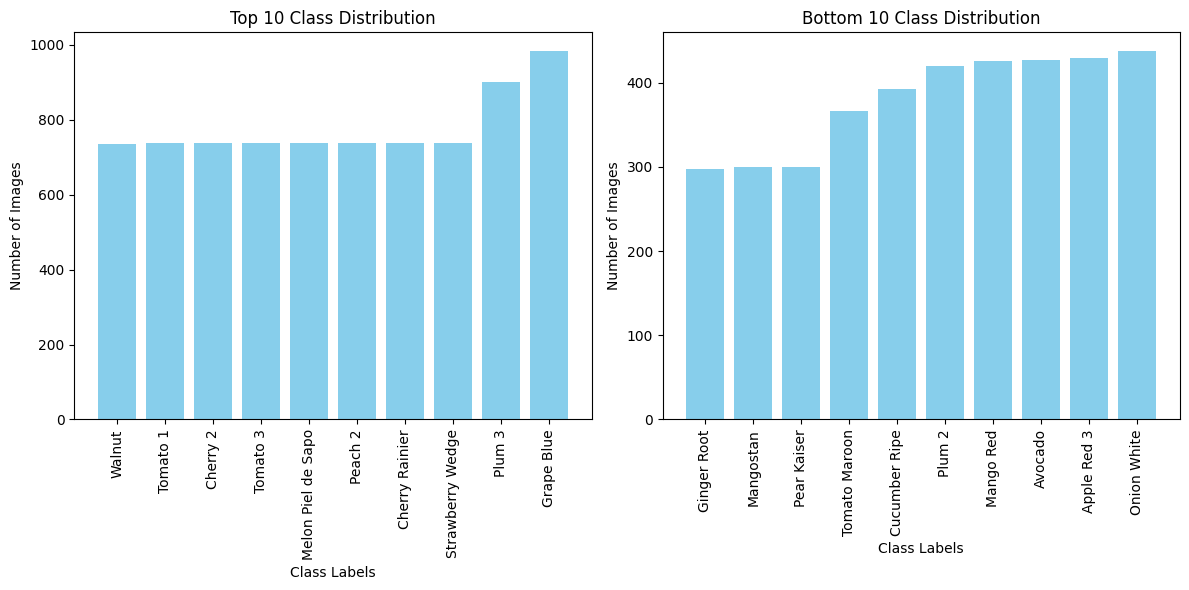

In [9]:

# Function to count the number of images in each class
def count_images_per_class(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Count the number of images per class in the training directory
train_class_counts = count_images_per_class(data_dir)

# Sort class counts by their values
sorted_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[1]))

# Take the top 10 and bottom 10 classes
top_10_classes = dict(list(sorted_class_counts.items())[-10:])
bottom_10_classes = dict(list(sorted_class_counts.items())[:10])

# Plot the top 10 classes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(top_10_classes.keys(), top_10_classes.values(), color='skyblue')
plt.title('Top 10 Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

# Plot the bottom 10 classes
plt.subplot(1, 2, 2)
plt.bar(bottom_10_classes.keys(), bottom_10_classes.values(), color='skyblue')
plt.title('Bottom 10 Class Distribution')
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically

plt.tight_layout()
plt.show()

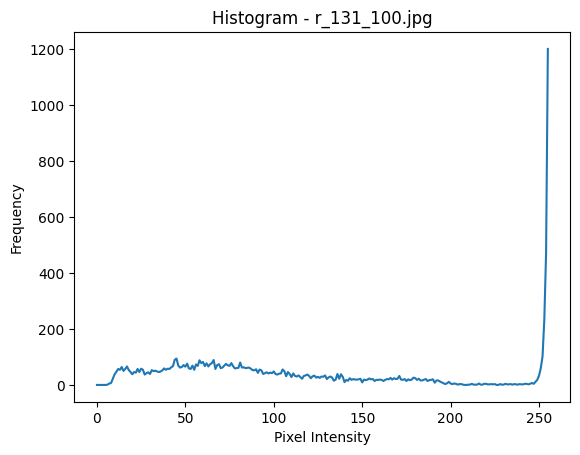

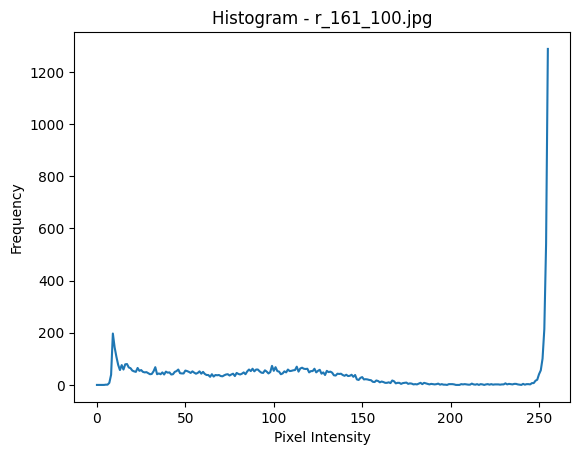

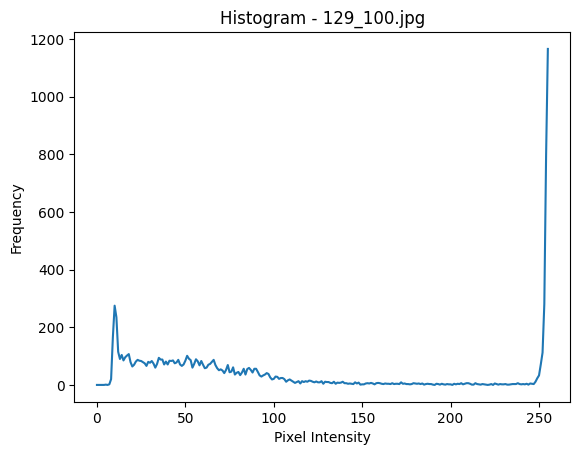

In [10]:

# Select 3 random image paths from the directory
selected_image_paths = np.random.choice(list(data_dir.glob("Apple Braeburn/*.jpg")), 3, replace=False)

# Iterate over the selected image paths
for image_path in selected_image_paths:
    # Load an image
    image = cv2.imread(str(image_path))

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate histogram
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    # Plot histogram
    plt.figure()
    plt.title('Histogram - {}'.format(image_path.name))
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.plot(hist)
    plt.show()

In [11]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import glob as gb
# Define the data directory
# List to store image sizes
size = []
# Iterate through each folder in the seg_train directory
for folder in os.listdir(os.path.join(data_dir)):
    # Glob all jpg files in the current folder
    files = gb.glob(os.path.join(data_dir, folder, '*.jpg'))
    # Iterate through each file
    for file in files:
        # Read the image and get its shape
        image = plt.imread(file)
        size.append(image.shape)
# Count the occurrence of each size
size_counts = pd.Series(size).value_counts()
# Display the counts of each size
print(size_counts)
# Print the most common size
most_common_size = size_counts.idxmax()
print("Most common size:", most_common_size)

(100, 100, 3)    67692
Name: count, dtype: int64
Most common size: (100, 100, 3)


In [12]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.choice(os.listdir(target_folder))

    # Read in the image
    img = mpimg.imread(os.path.join(target_folder, random_image))

    return img

# Define the number of rows and columns for subplots
rows = 17  # Adjust according to the total number of classes (131 in this case)
cols = 8   # Adjust the number of columns as needed

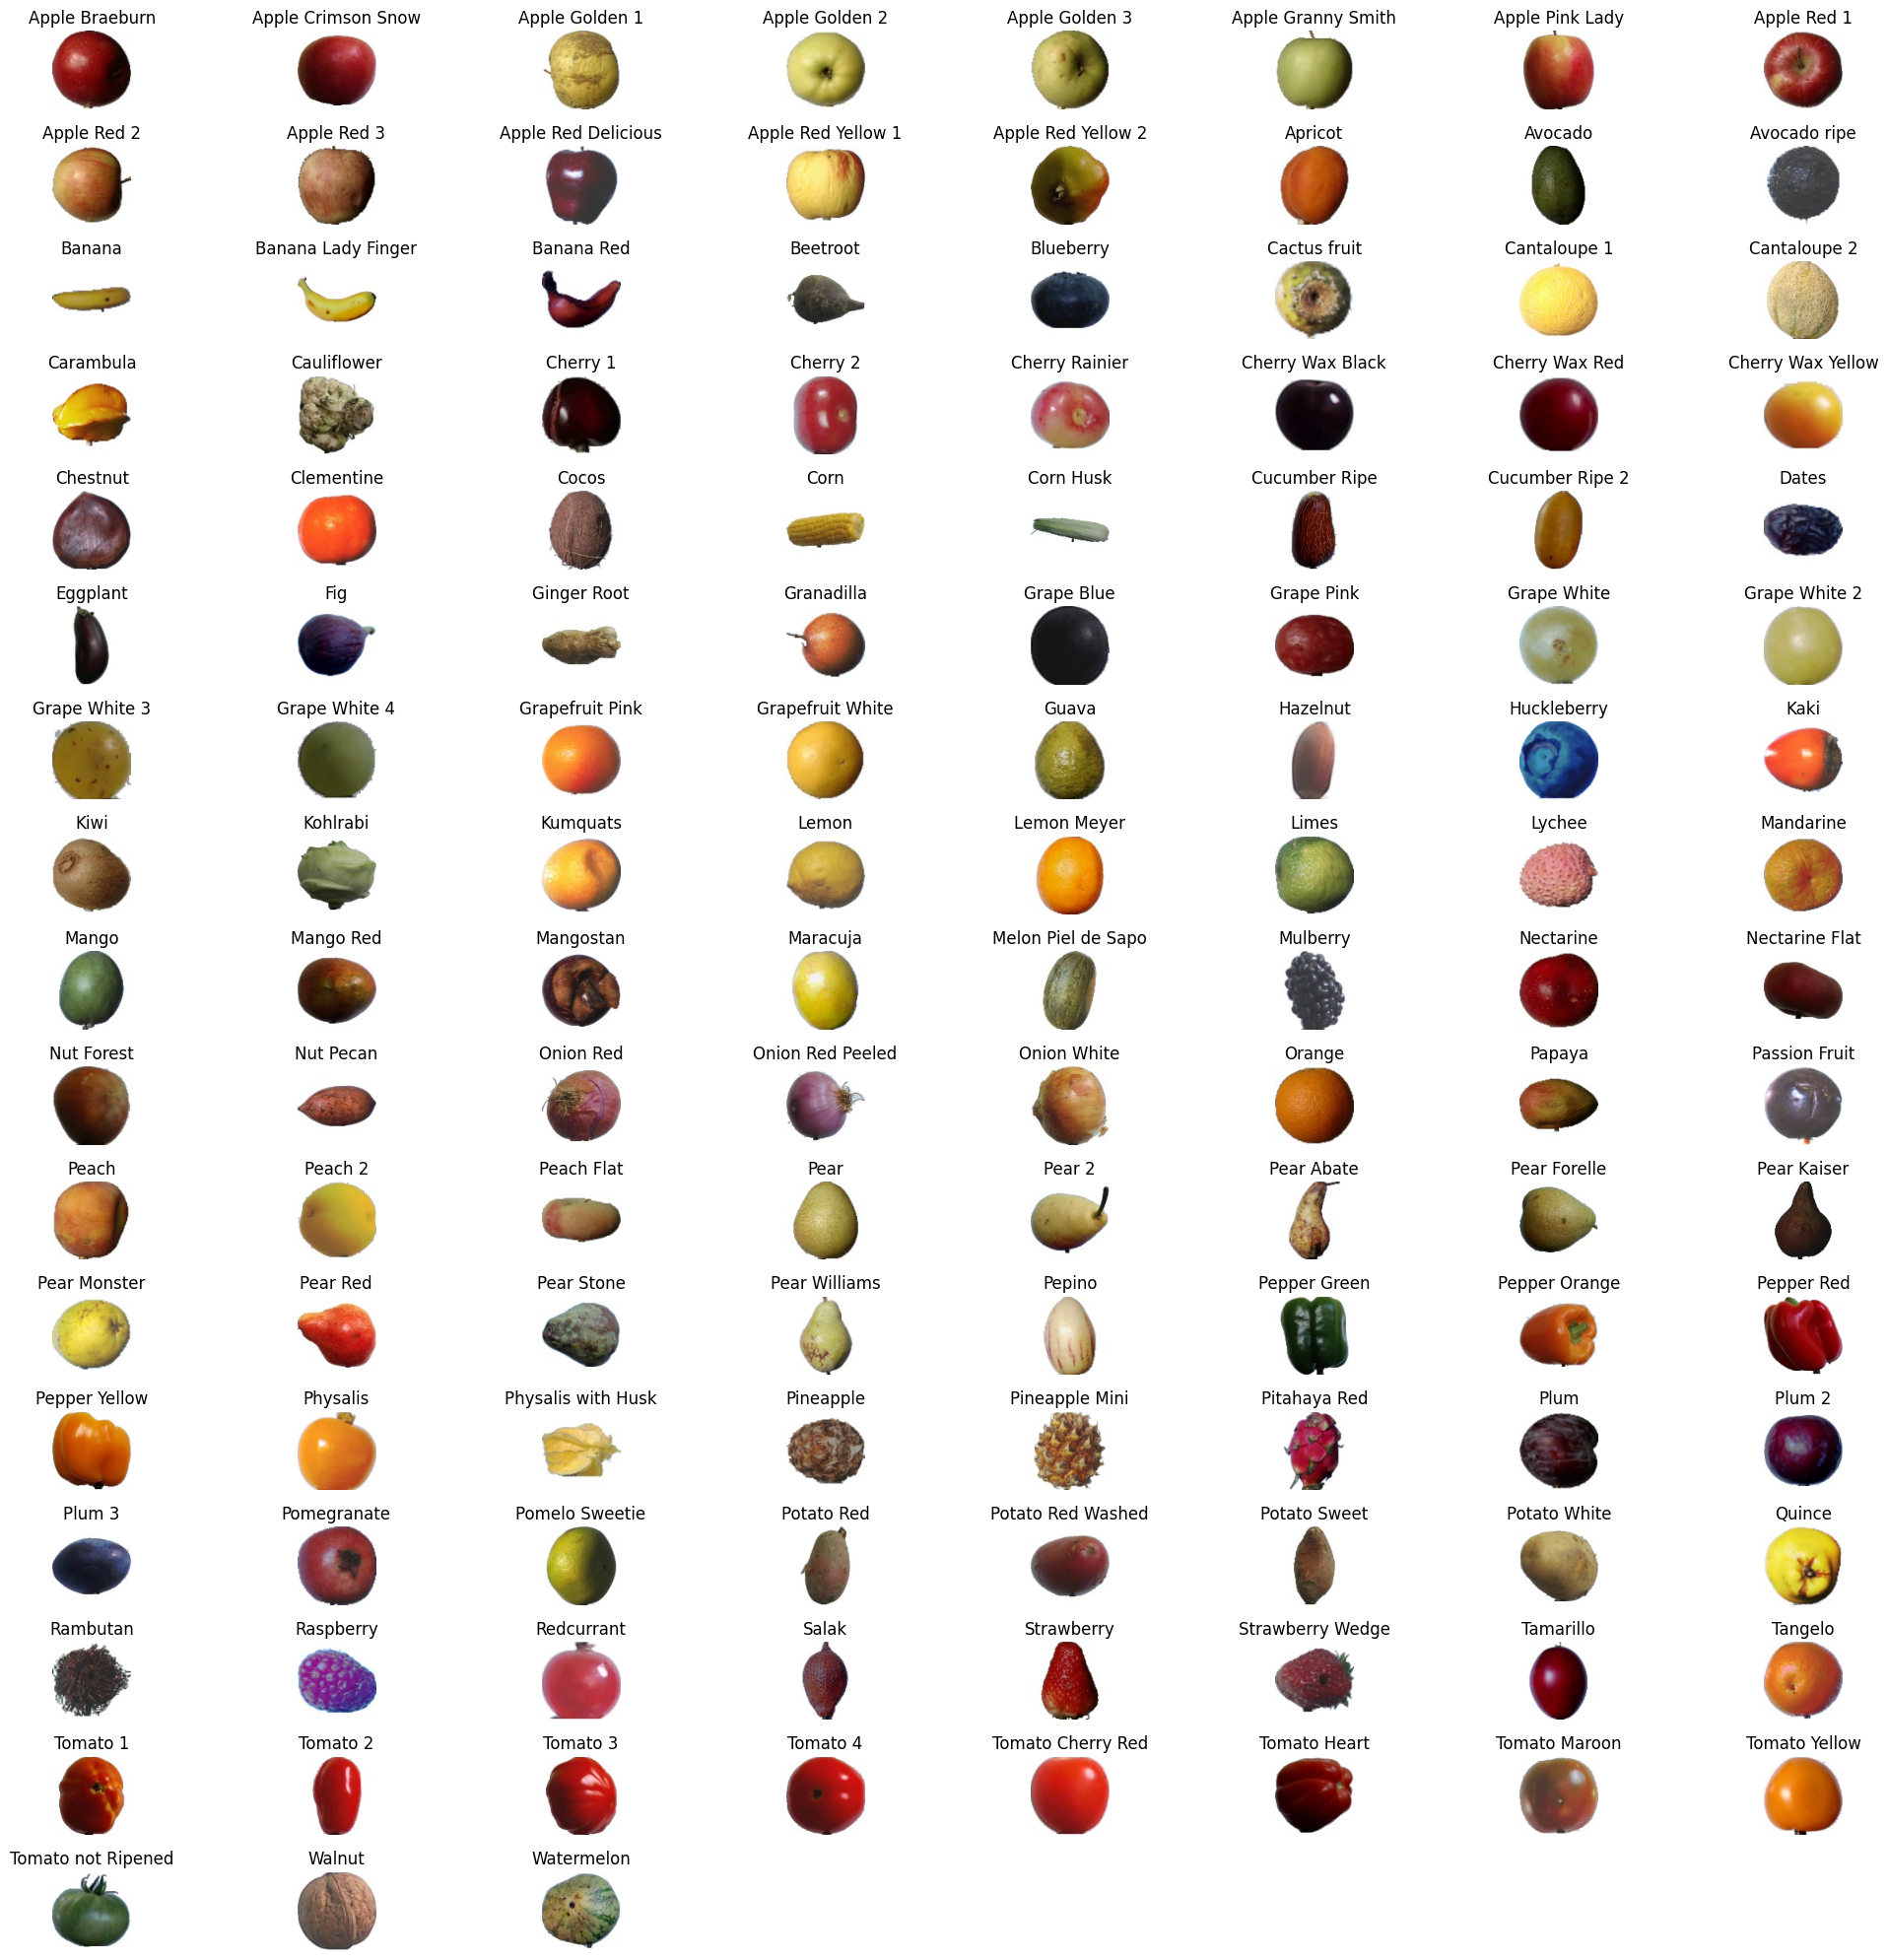

In [13]:
plt.figure(figsize=(20, 20))
# View a random image from the training dataset for all classes
for i, class_name in enumerate(class_names):
    img = view_random_image(target_dir=data_dir, target_class=class_name)
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis("off")
plt.tight_layout()
plt.show()

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Preprocessing & Using ImageDataGenerator() to Read Images</h1>
</div>


In [14]:
train_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_train,
    target_size=(100, 100),
    batch_size=60,
    classes=classes,
    class_mode='categorical'  
)
val_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_val,
    target_size=(100, 100),
    batch_size=75,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    df_test,
    target_size=(100, 100),
    batch_size=75,
    classes=classes,
    class_mode='categorical',
    shuffle=False
)
train_generator = train_gen
validation_generator = val_gen
test_generator = test_gen

Found 47384 validated image filenames belonging to 131 classes.
Found 20308 validated image filenames belonging to 131 classes.
Found 22688 validated image filenames belonging to 131 classes.


In [15]:
(train_gen.classes)

[125,
 48,
 108,
 75,
 57,
 68,
 101,
 119,
 43,
 49,
 72,
 51,
 34,
 24,
 110,
 116,
 34,
 79,
 23,
 97,
 19,
 120,
 125,
 21,
 88,
 33,
 15,
 63,
 41,
 86,
 66,
 0,
 26,
 36,
 123,
 126,
 72,
 20,
 2,
 4,
 34,
 5,
 61,
 67,
 17,
 104,
 16,
 22,
 14,
 82,
 124,
 8,
 81,
 40,
 121,
 61,
 101,
 38,
 20,
 85,
 18,
 62,
 6,
 64,
 92,
 22,
 25,
 10,
 18,
 28,
 8,
 82,
 54,
 128,
 71,
 70,
 129,
 99,
 117,
 92,
 94,
 32,
 57,
 24,
 20,
 52,
 13,
 111,
 116,
 66,
 0,
 125,
 75,
 11,
 14,
 68,
 33,
 52,
 4,
 122,
 104,
 93,
 107,
 39,
 68,
 119,
 72,
 117,
 5,
 115,
 58,
 68,
 46,
 1,
 58,
 101,
 126,
 129,
 80,
 74,
 78,
 16,
 54,
 32,
 67,
 45,
 84,
 41,
 128,
 7,
 30,
 113,
 48,
 115,
 117,
 92,
 98,
 30,
 22,
 46,
 52,
 117,
 102,
 52,
 72,
 7,
 37,
 32,
 88,
 101,
 13,
 3,
 25,
 99,
 125,
 85,
 44,
 116,
 111,
 42,
 88,
 58,
 125,
 104,
 66,
 120,
 78,
 50,
 13,
 96,
 124,
 60,
 57,
 28,
 94,
 104,
 7,
 110,
 64,
 7,
 55,
 73,
 125,
 28,
 100,
 46,
 77,
 95,
 12,
 102,
 112,
 104,
 81,
 

In [16]:
y_test = test_generator.classes
y_test

[111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 111,
 51,

In [17]:
train_gen.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Modeling</h1>
</div>


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5) ,            
    Dense(131, activation='softmax')  
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
from tensorflow.keras.metrics import Accuracy, Precision, Recall

In [20]:
from tensorflow.keras import backend as K

# Define F1 Score metric
class F1Score(tf.keras.metrics.Metric):
    def __init__(self, name='f1_score', **kwargs):
        super(F1Score, self).__init__(name=name, **kwargs)
        self.precision = Precision()
        self.recall = Recall()

    def update_state(self, y_true, y_pred, sample_weight=None):
        self.precision.update_state(y_true, y_pred, sample_weight)
        self.recall.update_state(y_true, y_pred, sample_weight)

    def result(self):
        precision = self.precision.result()
        recall = self.recall.result()
        return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

    def reset_state(self):  # Renamed from reset_states
        self.precision.reset_state()
        self.recall.reset_state()

In [21]:
metrics = [
    'accuracy',
    Precision(),  # Precision
    Recall(),     # Recall
    F1Score()
]

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=metrics)

model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=55,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/55


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.0194 - f1_score: 0.0000e+00 - loss: 4.9057 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0200 - val_f1_score: 0.0000e+00 - val_loss: 4.8492 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 796ms/step - accuracy: 0.0140 - f1_score: 0.0000e+00 - loss: 4.8383 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0417 - val_f1_score: 0.0000e+00 - val_loss: 4.7422 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 804ms/step - accuracy: 0.0380 - f1_score: 0.0000e+00 - loss: 4.6394 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.0733 - val_f1_score: 0.0000e+00 - val_loss: 4.3235 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 780ms/step - accuracy: 0.0615 - f1_score: 0.0068 - loss: 4.3404 - precision: 0.7222 - recall: 0.0034 - val_accuracy: 0.1333 - val_f1_score: 0.0165 - val

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 827ms/step - accuracy: 0.9043 - f1_score: 0.8970 - loss: 0.3063 - precision: 0.9362 - recall: 0.8610 - val_accuracy: 0.9750 - val_f1_score: 0.9748 - val_loss: 0.0962 - val_precision: 0.9831 - val_recall: 0.9667
Epoch 36/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 892ms/step - accuracy: 0.8776 - f1_score: 0.8940 - loss: 0.3530 - precision: 0.9225 - recall: 0.8672 - val_accuracy: 0.9667 - val_f1_score: 0.9695 - val_loss: 0.1311 - val_precision: 0.9862 - val_recall: 0.9533
Epoch 37/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 806ms/step - accuracy: 0.8662 - f1_score: 0.8749 - loss: 0.3785 - precision: 0.9048 - recall: 0.8471 - val_accuracy: 0.9667 - val_f1_score: 0.9653 - val_loss: 0.1146 - val_precision: 0.9811 - val_recall: 0.9500
Epoch 38/55
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 820ms/step - accuracy: 0.8754 - f1_score: 0.8768 - loss: 0.3969 - precision: 0.9176 - recall: 0.8396 - val_accuracy: 0.9650 - val_f1_score: 0.9570 - val_loss: 0.1390 - val_precision: 0.9692 - val_recall: 0.9450
Epoch 39

In [23]:
model.save('model2.h5')

In [24]:
eval_result = model.evaluate(test_generator)

303/303 ━━━━━━━━━━━━━━━━━━━━ 153s 506ms/step - accuracy: 0.9085 - f1_score: 0.9109 - loss: 0.3593 - precision: 0.9278 - recall: 0.8947


In [25]:
print("Test Accuracy:", eval_result[1] )
print("Test Loss:", eval_result[0] )
print("Test Precision:", eval_result[2] )
print("Test Recall:", eval_result[1] )
print("Test f1_score:", eval_result[1] )

Test Accuracy: 0.9103050231933594
Test Loss: 0.34128662943840027
Test Precision: 0.9268815517425537
Test Recall: 0.9103050231933594
Test f1_score: 0.9103050231933594


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Prediccion: Ginger Root


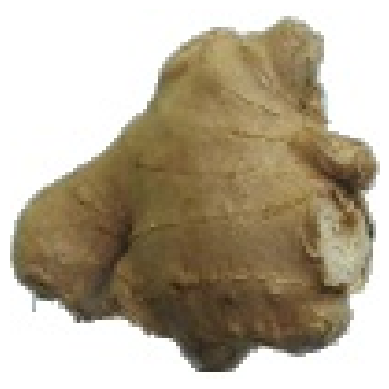

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    fruits = train_generator.class_indices
    img = image.load_img(img_path, target_size=(100, 100))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = [k for k, v in fruits.items() if v == predicted_class][0]
    
    print("Prediccion:", predicted_label)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
predict_image('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Ginger Root/132_100.jpg', model)

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">GRAD-CAM</h1>
</div>


In [27]:
def grad_cam_heatmap(image, last_conv_layer_name='last_conv'):
    
    if model.layers[0].__class__.__name__ == 'Functional':
        last_conv_layer_idx = 0
        last_conv_layer_model = model.layers[0]
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_idx = model.layers.index(last_conv_layer)
        last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)


    classifier_input = tf.keras.Input(shape=last_conv_layer_model.output.shape[1:])
    x = classifier_input
    classifier_layers = model.layers[last_conv_layer_idx+1:]
    for layer in classifier_layers:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)


    with tf.GradientTape() as tape:
        # Compute activations of the last conv layer and make the tape watch it
        last_conv_layer_output = last_conv_layer_model(image)
        tape.watch(last_conv_layer_output)
        # Compute class predictions
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]
        #print(CLASSES[top_pred_index])

    # This is the gradient of the top predicted class with regard to
    # the output feature map of the last conv layer
    grads = tape.gradient(top_class_channel, last_conv_layer_output)


    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    # The channel-wise mean of the resulting feature map
    # is our heatmap of class activation
    heatmap = np.mean(last_conv_layer_output, axis=-1)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

In [28]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np

def grad_cam_heatmap(img_path, model, last_conv_layer_name='last_conv'):
    img = cv2.imread(img_path)
    img = np.expand_dims(img, axis=0).astype('float32') / 255.0

    if model.layers[0].__class__.__name__ == 'Functional':
        last_conv_layer_idx = 0
        last_conv_layer_model = model.layers[0]
    else:
        last_conv_layer = model.get_layer(last_conv_layer_name)
        last_conv_layer_idx = model.layers.index(last_conv_layer)
        last_conv_layer_model = tf.keras.Model(model.inputs, last_conv_layer.output)

    classifier_input = tf.keras.Input(shape=last_conv_layer_model.output.shape[1:])
    x = classifier_input
    classifier_layers = model.layers[last_conv_layer_idx+1:]
    for layer in classifier_layers:
        x = layer(x)
    classifier_model = tf.keras.Model(classifier_input, x)

    with tf.GradientTape() as tape:
        last_conv_layer_output = last_conv_layer_model(img)
        tape.watch(last_conv_layer_output)
        preds = classifier_model(last_conv_layer_output)
        top_pred_index = tf.argmax(preds[0])
        top_class_channel = preds[:, top_pred_index]

    grads = tape.gradient(top_class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    last_conv_layer_output = last_conv_layer_output.numpy()[0]
    pooled_grads = pooled_grads.numpy()
    for i in range(pooled_grads.shape[-1]):
        last_conv_layer_output[:, :, i] *= pooled_grads[i]

    heatmap = np.mean(last_conv_layer_output, axis=-1)
    heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

    return heatmap

def grad_cam(img_path, model, last_conv_layer_name='conv2d_2'):
    colors = plt.cm.jet(np.arange(256))[:, :3]
    gc_mask = grad_cam_heatmap(img_path, model, last_conv_layer_name)
    gc_mask_uint8 = (gc_mask*255.0).astype('uint8')
    heatmap = colors[gc_mask_uint8]
    img = cv2.imread(img_path).astype('uint8')
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = (heatmap*255).astype('uint8')
    img_overlay = cv2.addWeighted(src1=img, alpha=0.6, src2=heatmap, beta=0.4, gamma=0.0)

    fig, ax = plt.subplots()
    im = ax.imshow(cv2.cvtColor(img_overlay, cv2.COLOR_BGR2RGB))

    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.set_label('Activation')

    plt.show()

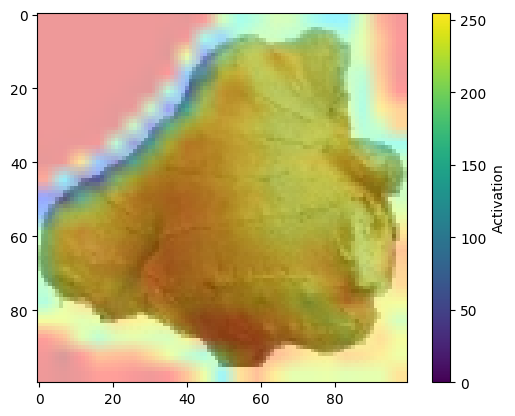

In [29]:
grad_cam('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test/Ginger Root/130_100.jpg',model)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 131)            │        67,203 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,143,691 (76.84 MB)

 Trainable params: 6,714,563 (25.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,429,128 (51.23 MB)

<div style="background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%); padding: 10px; border-radius: 3px; text-align: center; border: 2px solid white;">
    <h1 style="color: white; font-size: 20px; font-weight: bold;">Confusion Matrix and Performance Measurements</h1>
</div>


In [31]:
def f1_score(y_true, y_pred):
    precision = Precision()(y_true, y_pred)
    recall = Recall()(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))

In [32]:
y_pred = model.predict(test_generator)

303/303 ━━━━━━━━━━━━━━━━━━━━ 65s 215ms/step


In [33]:
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([111, 111, 111, ..., 121, 121, 121])

True Positives (TP): 122
False Positives (FP): 0
True Negatives (TN): 95
False Negatives (FN): 0
Confusion Matrix:
[[ 95   0   0 ...   0   0   0]
 [  0 122   0 ...   0   0   0]
 [  0   0 158 ...   0   0   0]
 ...
 [  0   0   0 ... 101   0   0]
 [  0   0   0 ...   0 249   0]
 [  0   0   0 ...   0   0 157]]


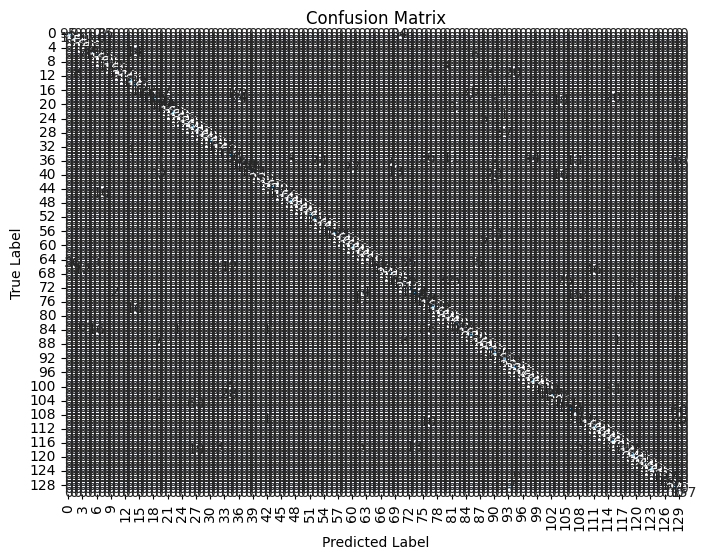

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


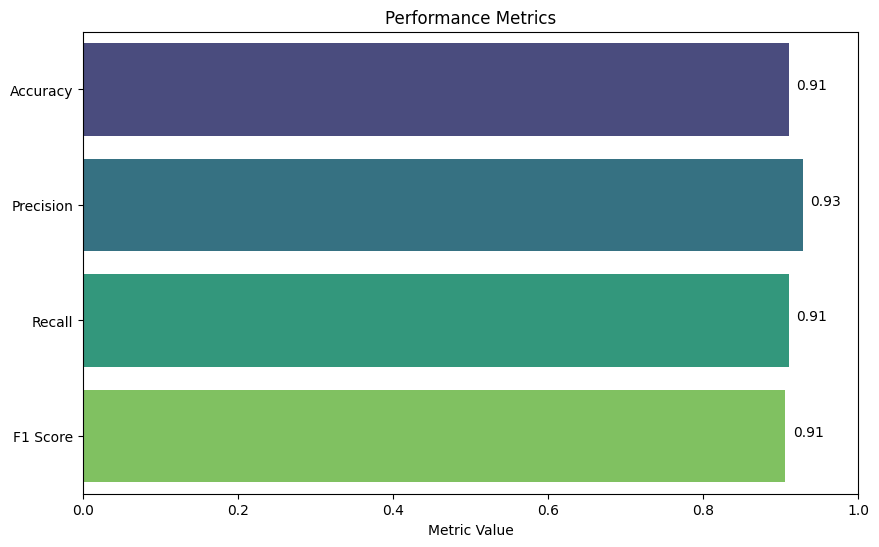

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Extract TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print TP, FP, TN, FN
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

# Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=metrics_values, y=metrics_names, palette="viridis")
plt.xlabel('Metric Value')
plt.title('Performance Metrics')
plt.xlim(0, 1)  # Adjust the x-axis limits if needed

# Add data labels on each bar
for i, v in enumerate(metrics_values):
    barplot.text(v + 0.01, i, str(round(v, 2)), color='black', ha='left')

plt.show()


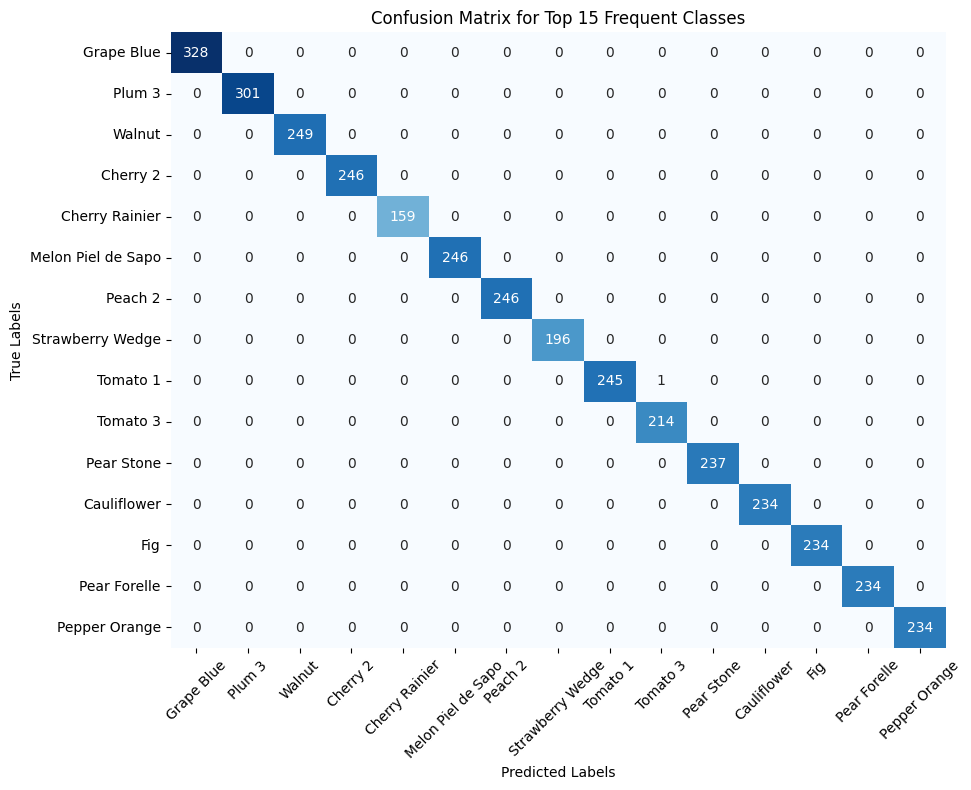

In [36]:
# Assuming you have the true labels (y_test) and predicted labels (y_pred)
# Assuming you already have the confusion matrix (cm)
# Assuming you have a list of class names (class_names)

# Calculate the frequency of each class in the true labels
class_freq = {class_label: sum([1 for label in y_test if label == class_label]) for class_label in set(y_test)}

# Get the top ten classes with the highest frequencies
top_ten_classes = sorted(class_freq, key=class_freq.get, reverse=True)[:15]

# Filter the confusion matrix to include only the top ten classes
top_ten_cm = cm[top_ten_classes][:, top_ten_classes]

# Get the class names for the top ten classes
top_ten_class_names = [class_names[class_label] for class_label in top_ten_classes]

# Plot the filtered confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(top_ten_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Top 15 Frequent Classes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Set tick labels
plt.xticks(ticks=np.arange(15) + 0.5, labels=top_ten_class_names, rotation=45)
plt.yticks(ticks=np.arange(15) + 0.5, labels=top_ten_class_names, rotation=0)

plt.show()


## Deployment Using Streamlit: [Link](https://www.kaggle.com/code/abdallahprogrammer/fruit-classification-using-cnn-deployment)